In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

Dataset shape: (768, 10)
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28

Missing values:
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


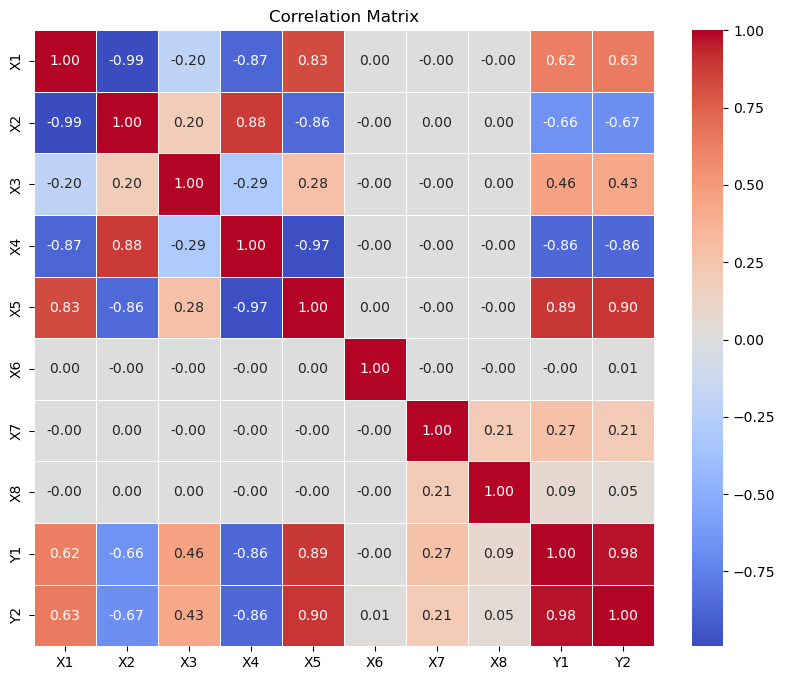


Potential outliers:
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [12]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data = pd.read_excel(url)
# data.columns = [
#     "Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", 
#     "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"
# ]
print("Dataset shape:", data.shape)
print(data.head())
print("\nMissing values:\n", data.isnull().sum())
correlations = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("\nPotential outliers:\n", outliers)



In [13]:
# Define features (X) and target (y)
X = data.drop(columns=['Y1', 'Y2'])  # Drop target variables
y = data["Y1"]

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (important for Ridge and Lasso regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



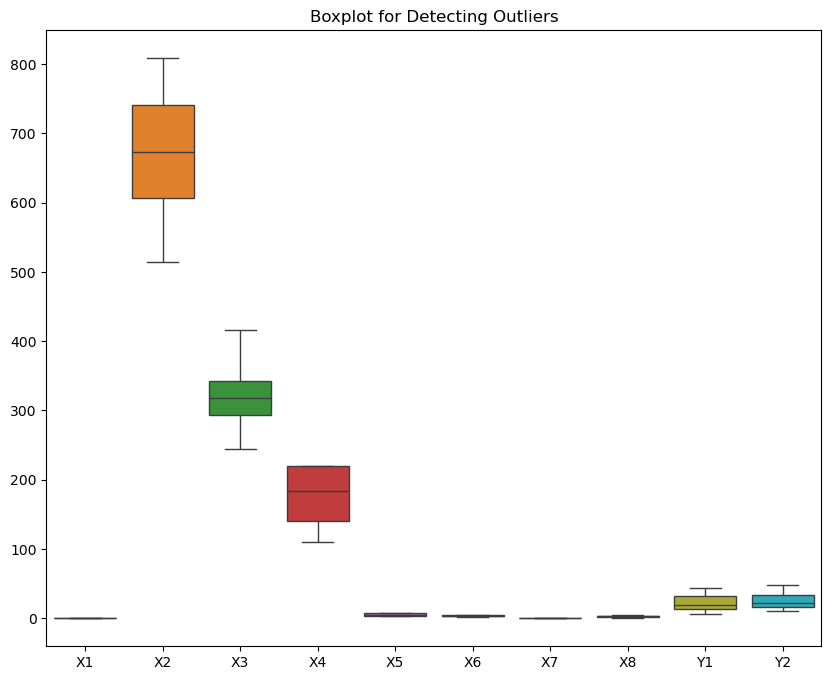

In [14]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.title("Boxplot for Detecting Outliers")
plt.show()

In [18]:
#creating manual linear regression using normal equation theta = (XTX)-1XTy
def linear_regression(X_train ,  y_train):
    # Add intercept column to X_train
    X_train_b =  np.c_[np.ones(X_train.shape[0]), X_train]
     # Calculate coefficients using the Normal Equation
    theta = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
    return theta

# Training the model (from scratch)
theta_manual = linear_regression(X_train_scaled, y_train)
print(theta_manual)



# Linear regression using sklearn
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print(lr.intercept_)
print(lr.coef_)


# Lasso Regression using sklearn
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)
print(lasso_reg.intercept_)
print(lasso_reg.coef_)


# Ridge Regression using sklearn
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)
print(ridge_reg.intercept_)
print(ridge_reg.coef_)


# Predictions for each model on the test set
y_pred_manual = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled].dot(theta_manual)
y_pred_sklearn = lr.predict(X_test_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
y_pred_lasso = lasso_reg.predict(X_test_scaled)



# Calculate metrics
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse


[ 22.15503257  -9.45009467   6.22371661  -5.02621067 -17.14549307
   7.21546395  -0.03593382   2.70005138   0.32734522]
22.07928082631442
[-6.51760118e+00 -1.24376276e+14  6.11375959e+13  1.26858218e+14
  7.29709093e+00  5.05826565e-02  2.90926895e+00  1.99763992e-01]
22.1550325732899
[-9.20599998e-04  0.00000000e+00  2.16061688e+00 -0.00000000e+00
  8.24762122e+00 -0.00000000e+00  2.63575701e+00  2.47241646e-01]
22.155032573289894
[-5.37546492 -2.84851939  0.99163525 -3.27069412  7.48142213 -0.03567924
  2.69922983  0.32868739]


Manual Linear Regression: R²=0.9087, MSE=9.5123, RMSE=3.0842 
Sklearn Linear Regression: R²=0.9114, MSE=9.2319, RMSE=3.0384
Ridge Regression: R²=0.9116, MSE=9.2138, RMSE=3.0354 
Lasso Regression: R²=0.9046, MSE=9.9388, RMSE=3.1526 


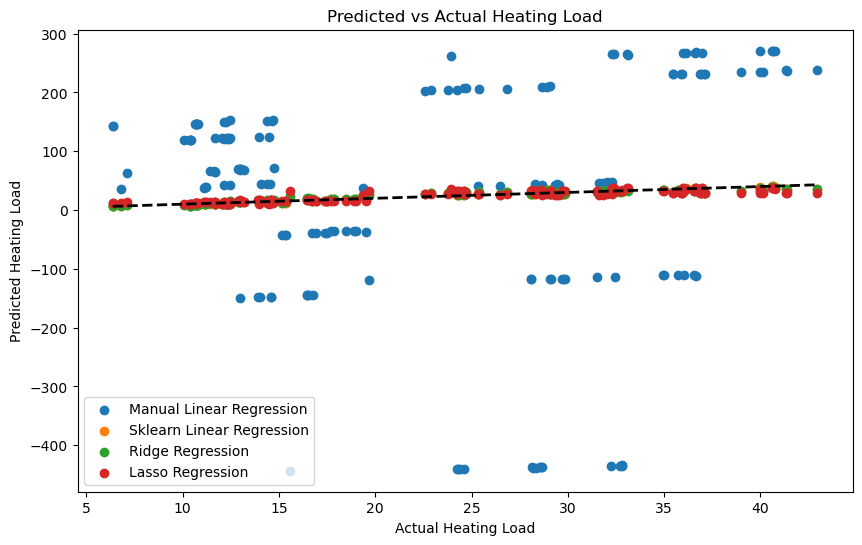

In [19]:
# Evaluate manual model (from scratch)
r2_manual, mse_manual, rmse_manual = calculate_metrics(y_test, y_pred_manual)
# Evaluate sklearn models
r2_sklearn, mse_sklearn, rmse_sklearn  = calculate_metrics(y_test, y_pred_sklearn)
r2_ridge, mse_ridge, rmse_ridge  = calculate_metrics(y_test, y_pred_ridge)
r2_lasso, mse_lasso, rmse_lasso  = calculate_metrics(y_test, y_pred_lasso)

# Print results
print(f"Manual Linear Regression: R²={r2_manual:.4f}, MSE={mse_manual:.4f}, RMSE={rmse_manual:.4f} ")
print(f"Sklearn Linear Regression: R²={r2_sklearn:.4f}, MSE={mse_sklearn:.4f}, RMSE={rmse_sklearn:.4f}")
print(f"Ridge Regression: R²={r2_ridge:.4f}, MSE={mse_ridge:.4f}, RMSE={rmse_ridge:.4f} ")
print(f"Lasso Regression: R²={r2_lasso:.4f}, MSE={mse_lasso:.4f}, RMSE={rmse_lasso:.4f} ")

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
for model_name, y_pred in models.items():
    plt.scatter(y_test, y_pred, label=model_name)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Predicted vs Actual Heating Load")
plt.legend()
plt.show()



In [17]:
# (v) Energy efficiency improvement suggestions
# Analyze feature importance from the sklearn linear regression model
importance = pd.Series(sklearn_model.coef_, index=X_train.columns).sort_values(ascending=False)
print("\nFeature Importance:\n", importance)

print("\nSuggestions for energy efficiency improvement:")
print("- Focus on optimizing features like", importance.idxmax(), "as it has the most significant impact on Heating Load.")
print("- Consider improving insulation and thermal performance of", importance.index[1], "and", importance.index[2], ".")



Feature Importance:
 X2    1.074094e+12
X7    2.013880e+01
X5    4.118945e+00
X8    2.108351e-01
X6   -3.369912e-02
X1   -6.057636e+01
X3   -1.074094e+12
X4   -2.148188e+12
dtype: float64

Suggestions for energy efficiency improvement:
- Focus on optimizing features like X2 as it has the most significant impact on Heating Load.
- Consider improving insulation and thermal performance of X7 and X5 .
